In [170]:

# Imports

import pandas as pd
import re
import html
from bs4 import BeautifulSoup

import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")  # run only once
stop_words = set(stopwords.words("english"))

import sys
sys.path.append("../src")

from text_cleaner import clean_dataframe

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amitianeesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [171]:

QUESTIONS_PATH = "../data/raw/Questions.csv"
ANSWERS_PATH = "../data/raw/Answers.csv"
TAGS_PATH = "../data/raw/Tags.csv"

QUESTIONS_OUTPUT_PATH = "../data/processed/questions_clean.csv"
ANSWERS_OUTPUT_PATH = "../data/processed/answers_clean.csv"

CHUNK_SIZE = 50000  # rows processed at a time(large so chunckwise)


counting questions/answers/tags

In [ ]:

# question_count = sum(
#     len(chunk)
#     for chunk in pd.read_csv(QUESTIONS_PATH, encoding="latin1", chunksize=100000)
# )

# question_count


In [173]:
# answer_count = sum(
#     len(chunk)
#     for chunk in pd.read_csv(ANSWERS_PATH, encoding="latin1", chunksize=100000)
# )

# answer_count


In [174]:
# tag_count = sum(
#     len(chunk)
#     for chunk in pd.read_csv(TAGS_PATH, encoding="latin1", chunksize=100000)
# )

# tag_count


In [ ]:
# dataset_summary = pd.DataFrame({
#     "Type": ["Questions", "Answers", "Tags"],
#     "Count": [question_count, answer_count, tag_count]
# })

# dataset_summary


In [ ]:
sample_df_ques= pd.read_csv(
        QUESTIONS_PATH,
    encoding="latin1",
    nrows=5
)

# sample_df_ques.head()
sample_df_ques.head()


,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [ ]:
sample_df_ans= pd.read_csv(
    ANSWERS_PATH,
    encoding="latin1",
    nrows=5
)

sample_df_ans.head()


,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [178]:
from bs4 import XMLParsedAsHTMLWarning
import warnings

# Suppress XML warning once
warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

In [179]:
tags_df = pd.read_csv("../data/raw/Tags.csv")

print(tags_df.head())

   Id             Tag
0  80            flex
1  80  actionscript-3
2  80             air
3  90             svn
4  90     tortoisesvn


In [180]:
unique_tags = tags_df["Tag"].unique()

print("Total Unique Tags:", len(unique_tags))

Total Unique Tags: 37035


In [182]:
def clean_text_pipeline(text):
    if pd.isna(text):
        return ""

    # Decode HTML entities (e.g., &lt; → <)
    text = html.unescape(text)
    try:
        # Remove HTML/XML tags
        text = BeautifulSoup(text, "html.parser").get_text()
    except Exception:
        return ""
    
    # Convert to lowercase
    text = text.lower()

    # Remove non-alphabetic characters
    text = re.sub(r"[^a-z\s]", " ", text)

    # Normalize multiple spaces
    text = re.sub(r"\s+", " ", text)

    # Tokenize
    tokens = text.split()

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Join back
    text = " ".join(tokens)

    return text.strip()


In [183]:
unique_tags_df = pd.DataFrame(unique_tags, columns=["Tag"]) 

In [184]:
unique_tags_df.to_csv("../data/processed/unique_tags.csv", index=False)

print("Unique tags file saved successfully.") 

Unique tags file saved successfully.


In [185]:
tag_counts = tags_df["Tag"].value_counts()

print(tag_counts.head(20))


Tag
javascript       124155
java             115212
c#               101186
php               98808
android           90659
jquery            78542
python            64601
html              58976
c++               47591
ios               47009
mysql             42464
css               42308
sql               35782
asp.net           29970
objective-c       26922
ruby-on-rails     25789
.net              24059
c                 23238
iphone            21539
angularjs         20345
Name: count, dtype: int64


In [186]:
# test_df = pd.read_csv(
#     QUESTIONS_PATH,
#     encoding="latin1",
#     nrows=10000
# )

# test_df["raw_text"] = (
#     test_df["Title"].fillna("") + " " +
#     test_df["Body"].fillna("")
# )

# test_df["clean_text"] = test_df["raw_text"].apply(clean_text_pipeline)

# sample = test_df[["raw_text", "clean_text"]].iloc[0]

# print("RAW TEXT:\n", sample["raw_text"][:500])
# print("\nCLEAN TEXT:\n", sample["clean_text"][:500])


In [187]:
questions_df = pd.read_csv(
    "../data/raw/Questions.csv",
    encoding="latin1"
)

questions_df.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [188]:
# tags = pd.read_csv(
#     "../data/processed/unique_tags.csv",
#     encoding="latin1"
# ) 
# tags.head()

In [189]:
# Load tags
tags_df = pd.read_csv("../data/processed/unique_tags.csv", encoding="latin1")

# Convert to clean lowercase list
tags = (
    tags_df.iloc[:, 0]
    .dropna()
    .astype(str)
    .str.lower()
    .str.strip()
    .tolist()
)

print("Total tags loaded:", len(tags))

Total tags loaded: 37034


In [190]:
# Create placeholder mapping
tag_placeholder_map = {}

for i, tag in enumerate(tags):
    placeholder = f"TAGTOKEN{i}"
    tag_placeholder_map[tag] = placeholder

# Reverse map (to restore later)
reverse_map = {v: k for k, v in tag_placeholder_map.items()}

In [191]:
def protect_tags(text):
    if pd.isna(text):
        return ""
    
    text = text.lower()
    
    for tag, placeholder in tag_placeholder_map.items():
        # replace whole word matches only
        text = re.sub(rf"\b{re.escape(tag)}\b", placeholder, text)
    
    return text
    

In [192]:
# from bs4 import BeautifulSoup

def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text(separator=" ")

In [193]:
#Normal Cleaning (Without Damaging Tags)
def clean_text(text):
    text = remove_html(text)
    
    # remove special characters but keep placeholders
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)
    
    # remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    
    return text

In [194]:
#Restore Tags Back
def restore_tags(text):
    for placeholder, tag in reverse_map.items():
        text = text.replace(placeholder, tag)
    return text

In [195]:
def full_clean_pipeline(text):
    #Final Pipeline Function
    text = protect_tags(text)
    text = clean_text(text)
    text = restore_tags(text)
    return text

In [196]:
import os

os.makedirs(os.path.dirname(QUESTIONS_OUTPUT_PATH), exist_ok=True)


In [197]:
# Full Dataset Cleaning (Chunk Processing)
first_chunk = True

for chunk in pd.read_csv(
    QUESTIONS_PATH,
    encoding="latin1",
    chunksize=CHUNK_SIZE
):
    chunk = chunk.sample(frac=0.2, random_state=42)
    # Combine title and body
    chunk["raw_text"] = (
        chunk["Title"].fillna("") + " " +
        chunk["Body"].fillna("")
    )

    # Apply cleaning pipeline
    chunk["clean_text"] = chunk["raw_text"].apply(clean_text_pipeline)

    # Keep only relevant columns
    processed_chunk = chunk[["Id", "Score", "clean_text"]]

    # Write incrementally
    processed_chunk.to_csv(
        QUESTIONS_OUTPUT_PATH,
        mode="w" if first_chunk else "a",
        header=first_chunk,
        index=False
    )

    first_chunk = False

print(" Full preprocessing complete.")


 Full preprocessing complete.


In [198]:
# verify
clean_df_sample = pd.read_csv(QUESTIONS_OUTPUT_PATH, nrows=5)

clean_df_sample.head()


,Id,Score,clean_text
0,1699490,-3,regular expression javascript want know write ...
1,607810,1,use windows authentication asp net ajax workin...
2,18290,50,secure database yml within ruby rails applicat...
3,759680,4,put sql queries using mix ejb jdbc access data...
4,1949640,7,iv work like salt aes understanding salt stuff...


In [199]:
# original_count = sum(
#     len(chunk)
#     for chunk in pd.read_csv(QUESTIONS_PATH, encoding="latin1", chunksize=100000)
# )

# clean_count = sum(
#     len(chunk)
#     for chunk in pd.read_csv(QUESTIONS_OUTPUT_PATH, chunksize=100000)
# )

# print("Original rows:", original_count)
# print("Cleaned rows:", clean_count)


In [200]:
#Apply to DataFrame
# questions_df["cleaned_body"] = questions_df["Body"].apply(full_clean_pipeline)

answers cleaning

In [201]:
sample_df_ans= pd.read_csv(
    ANSWERS_PATH,
    encoding="latin1",
    nrows=5
)

# sample_df_ans.head()
sample_df_ques.head()


,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [203]:
# Full Dataset Cleaning (Chunk Processing)
first_chunk = True

for chunk in pd.read_csv(
    ANSWERS_PATH,
    encoding="latin1",
    chunksize=CHUNK_SIZE
):
    chunk = chunk.sample(frac=0.2, random_state=42)
    # Combine title and body
    chunk["raw_text"] = (
        chunk["Body"].fillna("")
    )

    # Apply cleaning pipeline
    chunk["clean_text"] = chunk["raw_text"].apply(clean_text_pipeline)

    # Keep only relevant columns
    processed_chunk = chunk[["Id","ParentId", "Score", "clean_text"]]

    # Write incrementally
    processed_chunk.to_csv(
        ANSWERS_OUTPUT_PATH,
        mode="w" if first_chunk else "a",
        header=first_chunk,
        index=False
    )

    first_chunk = False

print(" Full preprocessing complete.")


 Full preprocessing complete.


In [204]:
import pandas as pd
answers_sample = pd.read_csv("../data/processed/answers_clean.csv", nrows=5)
answers_sample.head()

,Id,ParentId,Score,clean_text
0,604042,44980,94,found application hookup sessionswitcheventhan...
1,179221,178110,0,use combination project blog wiki think people...
2,6083,6080,0,openid seems good alternative writing user man...
3,232291,232280,2,shr bh probably shr dh
4,701590,701550,1,option use aggregate var q topelement elements...


In [206]:
import pandas as pd
# Load the newly cleaned answers (now has ParentId)
answers_clean = pd.read_csv("../data/processed/answers_clean.csv")
print("Answers shape:", answers_clean.shape)
print(answers_clean.head(3))

Answers shape: (402903, 4)
       Id  ParentId  Score                                         clean_text
0  604042     44980     94  found application hookup sessionswitcheventhan...
1  179221    178110      0  use combination project blog wiki think people...
2    6083      6080      0  openid seems good alternative writing user man...


In [207]:
# Group all answers by the question they belong to (ParentId = Question Id)
answer_stats = answers_clean.groupby("ParentId").agg(
    avg_answer_score=("Score", "mean"),
    answer_count=("Score", "count"),
    max_answer_score=("Score", "max")
).reset_index()
# Rename ParentId to question_id for clarity
answer_stats.rename(columns={"ParentId": "question_id"}, inplace=True)
print("Answer stats shape:", answer_stats.shape)
answer_stats.head(5)

Answer stats shape: (343145, 4)


,question_id,avg_answer_score,answer_count,max_answer_score
0,90,19.0,1,19
1,180,8.5,2,17
2,260,13.0,3,28
3,330,2.0,1,2
4,580,1.0,1,1


In [208]:
# STEP 3: Bayesian Smoothing + Normalize to 0-1
# (Replaces the simple min-max normalization)

global_mean = answer_stats["avg_answer_score"].mean()
C = answer_stats["answer_count"].mean()  # confidence factor

print(f"Global mean score: {global_mean:.2f}")
print(f"Confidence factor C: {C:.2f}")

# Apply Bayesian smoothing
answer_stats["bayesian_avg_score"] = (
    (C * global_mean + answer_stats["avg_answer_score"] * answer_stats["answer_count"])
    / (C + answer_stats["answer_count"])
)

# Normalize to 0-1
min_b = answer_stats["bayesian_avg_score"].min()
max_b = answer_stats["bayesian_avg_score"].max()

answer_stats["avg_score_normalized"] = (
    (answer_stats["bayesian_avg_score"] - min_b) / (max_b - min_b)
)

print("\nNormalized score range:")
print("Min:", answer_stats["avg_score_normalized"].min())
print("Max:", answer_stats["avg_score_normalized"].max())
print("Mean:", answer_stats["avg_score_normalized"].mean().round(4))

answer_stats.head(5)


Global mean score: 2.13
Confidence factor C: 1.17

Normalized score range:
Min: 0.0
Max: 1.0
Mean: 0.0175


,question_id,avg_answer_score,answer_count,max_answer_score,bayesian_avg_score,avg_score_normalized
0,90,19.0,1,19,9.888856,0.034531
1,180,8.5,2,17,6.143329,0.026261
2,260,13.0,3,28,9.942110,0.034649
3,330,2.0,1,2,2.069701,0.017266
4,580,1.0,1,1,1.609751,0.016250


In [209]:
# STEP 4: Threshold-based difficulty labels
# Hard  = bottom 25% normalized score (questions with few/low-rated answers)
# Medium = 25%-60%
# Easy  = top 40% (questions with many good answers)

def assign_difficulty(score):
    if score >= 0.035:      # top ~40%: well-answered questions = Easy
        return "Easy"
    elif score >= 0.020:  # middle band: Medium
        return "Medium"
    else:                # bottom ~25%: Hard (few/poor answers)
        return "Hard"

answer_stats["difficulty"] = answer_stats["avg_score_normalized"].apply(assign_difficulty)

print("Difficulty distribution:")
print(answer_stats["difficulty"].value_counts())


Difficulty distribution:
difficulty
Hard      310864
Medium     27494
Easy        4787
Name: count, dtype: int64


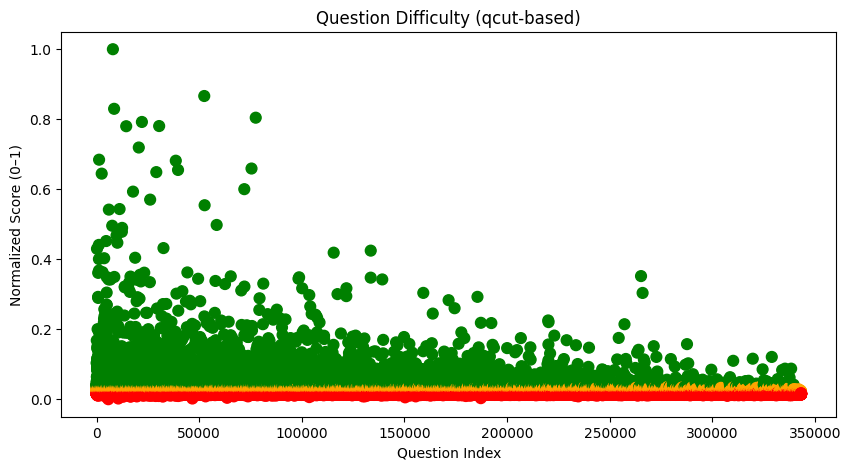

In [210]:
import matplotlib.pyplot as plt

# Convert difficulty labels to colors
color_map = {
    "Hard": "red",
    "Medium": "orange",
    "Easy": "green"
}

plt.figure(figsize=(10,5))

plt.scatter(
    answer_stats.index,
    answer_stats["avg_score_normalized"],
    c=answer_stats["difficulty"].map(color_map),
    s=60
)

plt.xlabel("Question Index")
plt.ylabel("Normalized Score (0–1)")
plt.title("Question Difficulty (qcut-based)")

plt.show()

In [213]:
# Load cleaned questions
questions_clean = pd.read_csv("../data/processed/questions_clean.csv")

# Merge difficulty labels
questions_with_labels = questions_clean.merge(
    answer_stats[["question_id", "difficulty"]],
    left_on="Id",
    right_on="question_id",
    how="inner"
)

print("After merge shape:", questions_with_labels.shape)
questions_with_labels.head()

After merge shape: (69255, 5)


,Id,Score,clean_text,question_id,difficulty
0,1699490,-3,regular expression javascript want know write ...,1699490,Hard
1,759680,4,put sql queries using mix ejb jdbc access data...,759680,Hard
2,1949640,7,iv work like salt aes understanding salt stuff...,1949640,Hard
3,2086450,0,pcre regex sed regex first sorry bad english g...,2086450,Hard
4,299940,45,set default proxy use default credentials foll...,299940,Hard


In [214]:
# STRATIFIED RANDOM SAMPLING — take 40% of data, balanced across difficulty classes
SAMPLE_FRAC = 0.4
RANDOM_STATE = 42

questions_sampled = (
    questions_with_labels
    .groupby("difficulty", group_keys=False)
    .apply(lambda grp: grp.sample(frac=SAMPLE_FRAC, random_state=RANDOM_STATE))
    .reset_index(drop=True)
)

print("Sampled shape:", questions_sampled.shape)
print(questions_sampled["difficulty"].value_counts())
print(tags_df.columns)


Sampled shape: (27702, 5)
difficulty
Hard      25040
Medium     2246
Easy        416
Name: count, dtype: int64
Index(['Tag'], dtype='object')


/var/folders/nf/x44b7nzd08g199dlf91ftlcw0000gn/T/ipykernel_20910/1551440122.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: grp.sample(frac=SAMPLE_FRAC, random_state=RANDOM_STATE))


In [ ]:
raw_tags = pd.read_csv("../data/raw/Tags.csv", encoding="latin1")

primary_tag = raw_tags.groupby("Id")["Tag"].first().reset_index()


questions_sampled = questions_sampled.merge(
    primary_tag,
    on="Id",
    how="left"
)

questions_sampled["Tag"] = questions_sampled["Tag"].fillna("other")

tag_dummies = pd.get_dummies(questions_sampled["Tag"])

   .htaccess   .net  .net-1.1  .net-3.5     2d     3d  64bit  actionscript  \
0      False  False     False     False  False  False  False         False   
1      False  False     False     False  False  False  False         False   
2      False  False     False     False  False  False  False         False   
3      False  False     False     False  False  False  False         False   
4      False  False     False     False  False  False  False         False   

   actionscript-3  active-directory  ...  youtrack  youtube-api  \
0           False             False  ...     False        False   
1           False             False  ...     False        False   
2           False             False  ...     False        False   
3           False             False  ...     False        False   
4           False             False  ...     False        False   

   youtube-iframe-api     z3  zend-framework  zend-framework2  zeromq    zip  \
0               False  False           False    

In [216]:
X_text = questions_sampled["clean_text"].fillna("")
y      = questions_sampled["difficulty"]
X_tags = tag_dummies.reset_index(drop=True)  # one-hot tag features


In [217]:
from sklearn.model_selection import train_test_split

X_train_text, X_test_text, y_train, y_test, X_train_tags, X_test_tags = train_test_split(
    X_text,
    y,
    X_tags,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix

vectorizer = TfidfVectorizer(
    max_features=10000,
    min_df=5,
    max_df=0.8,
    ngram_range=(1,2),
    sublinear_tf=True
)

X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf  = vectorizer.transform(X_test_text)


print("Train shape:", X_train.shape)
print("Test shape: ", X_test.shape)


Train shape: (22161, 11402)
Test shape:  (5541, 11402)


In [219]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=3000,
    class_weight="balanced",
    solver="lbfgs",
    random_state=42
)

model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [220]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7325392528424473

Classification Report:

              precision    recall  f1-score   support

        Easy       0.03      0.06      0.04        83
        Hard       0.92      0.78      0.85      5009
      Medium       0.12      0.31      0.17       449

    accuracy                           0.73      5541
   macro avg       0.36      0.38      0.35      5541
weighted avg       0.84      0.73      0.78      5541


Confusion Matrix:

[[   5   40   38]
 [ 141 3917  951]
 [  24  288  137]]


In [226]:
import numpy as np

# Combine TF-IDF feature names + one-hot tag column names
tfidf_names = list(vectorizer.get_feature_names_out())
tag_names   = list(X_train_tags.columns)
feature_names = tfidf_names + tag_names

for i, class_label in enumerate(model.classes_):
    top10 = np.argsort(model.coef_[i])[-10:]
    print(f"\nTop words for {class_label}:")
    print([feature_names[j] for j in top10])



Top words for Easy:
['pick', 'display text', 'odd', 'building', 'elixir', 'sublimetext2', 'whitespace', 'json', 'closest', 'mylist']

Top words for Hard:
['wordpress', 'next', 'could', 'thank', 'https', 'lot', 'output', 'columns', 'id', 'else']

Top words for Medium:
['applications', 'present', 'utc', 'operation', 'want store', 'continue', 'actually', 'apk', 'slice', 'err']


In [229]:
# TEST ON SAMPLE QUESTIONS — see predictions in action
import pandas as pd

# Pick 10 random samples from test set
sample_indices = y_test.sample(10, random_state=42).index

sample_texts = X_test_text.loc[sample_indices]
sample_actual = y_test.loc[sample_indices]
sample_tags   = X_test_tags.loc[sample_indices]   # one-hot tag features

# Combine TF-IDF + tag features (same as during training)
sample_tfidf    = vectorizer.transform(sample_texts)
sample_features = hstack([sample_tfidf, csr_matrix(sample_tags.values)])

# Predict
sample_preds = model.predict(sample_features)
sample_probs = model.predict_proba(sample_features)

# Show results
results = pd.DataFrame({
    "question_snippet":    sample_texts.str[:80].values,
    "actual_difficulty":    sample_actual.values,
    "predicted_difficulty": sample_preds,
    "confidence":          sample_probs.max(axis=1).round(3)
})

print("Model Predictions on Sample Questions:\n")
print(results.to_string(index=False))

# Count correct predictions
correct = (results["actual_difficulty"] == results["predicted_difficulty"]).sum()
print(f"\nCorrect: {correct}/10")


Model Predictions on Sample Questions:

                                                                question_snippet actual_difficulty predicted_difficulty  confidence
wordpress qtranslate display post language example languages en ru display index              Hard                 Hard       0.894
iphone sdk uibuttons uiscrollview resize scroll view fit non hidden buttons uibu              Hard                 Hard       0.729
sql plus pass parameters stored procedure using accept got problem pass characte              Hard               Medium       0.654
wont gldrawelements render triangles following game engine tutorial series thebe              Hard                 Hard       0.512
zf private repository project started zendskeletonapplication via composer need               Hard                 Hard       0.585
custom reports google analytics api goal retrieve user custom reports created go              Hard                 Hard       0.579
r find indices multiple maximums vec

In [230]:
import joblib, os

os.makedirs("../models", exist_ok=True)
joblib.dump(model, "../models/logistic_regression_model.pkl")
joblib.dump(vectorizer, "../models/tfidf_vectorizer.pkl")
print(" Saved!")


 Saved!
